# Example 1: How to find the equilibrium distance for the $H_2$ molecule using Entanglement Forged VQE

In this tutorial, we apply Entanglement Forged VQE to compute the energy of a $H_2$ molecule at different bond lengths. By doing so, we can identify the equilibrium distance for the molecule. 

In [1]:
import warnings

warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
import numpy as np

from qiskit.circuit.library import TwoLocal
from qiskit_nature.drivers import UnitsType, Molecule
from qiskit_nature.drivers.second_quantization import PySCFDriver
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.mappers.second_quantization import JordanWignerMapper
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit import Aer

import sys

sys.path.append("../../")
from entanglement_forging import EntanglementForgedVQE
from entanglement_forging import EntanglementForgedGroundStateSolver
from entanglement_forging import EntanglementForgedConfig

## Molecule definition

In [2]:
distances = np.arange(0.3, 1.5, 0.1)

molecules = []

for dist in distances:
    molecule = Molecule(
        geometry=[["H", [0.0, 0.0, 0.0]], ["H", [0.0, 0.0, dist]]],
        charge=0,
        multiplicity=1,
    )
    molecules = molecules + [molecule]

## Program code

In [3]:
bitstrings = [[1, 0], [0, 1]]
ansatz = TwoLocal(2, [], "cry", [[0, 1], [1, 0]], reps=1)

backend = Aer.get_backend("statevector_simulator")
converter = QubitConverter(JordanWignerMapper())

config = EntanglementForgedConfig(backend=backend, maxiter=100)
calc = EntanglementForgedGroundStateSolver(
    qubit_converter=converter, ansatz=ansatz, bitstrings_u=bitstrings, config=config
)

energies = []

for molecule, distance in zip(molecules, distances):
    driver = PySCFDriver.from_molecule(molecule, basis="sto3g")
    problem = ElectronicStructureProblem(driver)
    problem.second_q_ops()
    res = calc.solve(problem)
    energies_history = res.get_energies_history()
    energy = [None]
    if len(energies_history) > 0:
        energy = res.get_energies_history()[-1]
    energies = energies + energy
    print(f"Distance = {distance}, Energy = {energy[0]}")

Distance = 0.3, Energy = -0.601171064489257
Distance = 0.4, Energy = -0.9126835228459282
Distance = 0.5, Energy = -1.0528502178276746
Distance = 0.6000000000000001, Energy = -1.1161342995912382
Distance = 0.7000000000000002, Energy = -1.1360591281154382
Distance = 0.8000000000000003, Energy = -1.133879337102356
Distance = 0.9000000000000001, Energy = -1.1202416452753126
Distance = 1.0000000000000002, Energy = -1.1010261779313404
Distance = 1.1000000000000003, Energy = -1.0791929444577208
Distance = 1.2000000000000004, Energy = -1.056738113700157
Distance = 1.3000000000000005, Energy = -1.0351856287724186
Distance = 1.4000000000000004, Energy = -0.941484658110538


## Figure

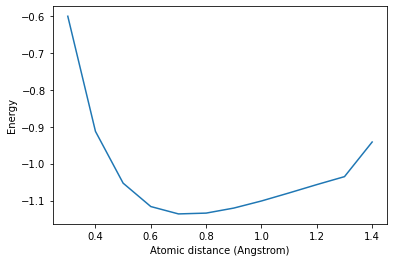

In [4]:
plt.plot(distances, energies)
plt.xlabel("Atomic distance (Angstrom)")
plt.ylabel("Energy")
plt.show()

In [5]:
import qiskit.tools.jupyter

%qiskit_version_table
%qiskit_copyright